# CNN + load image array 練習

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import PIL.Image
import os
import cv2
import pandas as pd
# os.environ["CUDA_VISIBLE_DEVICES"] = "0"
import tensorflow as tf
physical_devices = tf.config.experimental.list_physical_devices('GPU')
if len(physical_devices) > 0:
    for i in range(len(physical_devices)):
        tf.config.experimental.set_memory_growth(physical_devices[i], True)

In [2]:
# import package
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

barney_gumble_path = "./dataset/train/barney_gumble/"
groundskeeper_willie_path = "./dataset/train/groundskeeper_willie/"
maggie_simpson_path = "./dataset/train/maggie_simpson/"
mayor_quimby_path = "./dataset/train/mayor_quimby/"
selma_bouvier_path = "./dataset/train/selma_bouvier/"
waylon_smithers_path = "./dataset/train/waylon_smithers/"
test_barney_gumble_path = "./dataset/test/barney_gumble/"
test_groundskeeper_willie_path = "./dataset/test/groundskeeper_willie/"
test_maggie_simpson_path = "./dataset/test/maggie_simpson/"
test_mayor_quimby_path = "./dataset/test/mayor_quimby/"
test_selma_bouvier_path = "./dataset/test/selma_bouvier/"
test_waylon_smithers_path = "./dataset/test/waylon_smithers/"

In [3]:
!find . -name ".DS_Store" -delete
import shutil
import os

nowpath = os.getcwd()
try:   
    shutil.rmtree(nowpath +'/dataset/train/Digimon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/train/Pokemon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/test/Digimon/.ipynb_checkpoints')
except:
    pass
try:   
    shutil.rmtree(nowpath +'/dataset/test/Pokemon/.ipynb_checkpoints')
except:
    pass

## Load data

In [4]:
from os import listdir
import cv2



img_data = []
labels = []

size = 120,120
def iter_images(images,directory,size,label):
     for i in range(len(images)):
            if "gif" in images[i]: 
                continue
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size,PIL.Image.ANTIALIAS)
            img_data.append(img)
            labels.append(label)

iter_images(listdir(barney_gumble_path),barney_gumble_path,size,0)
iter_images(listdir(groundskeeper_willie_path),groundskeeper_willie_path,size,1)
iter_images(listdir(maggie_simpson_path),maggie_simpson_path,size,2)
iter_images(listdir(mayor_quimby_path),mayor_quimby_path,size,3)
iter_images(listdir(selma_bouvier_path),selma_bouvier_path,size,4)
iter_images(listdir(waylon_smithers_path),waylon_smithers_path,size,5)

In [5]:
len(img_data),len(labels)

(796, 796)

In [6]:
from os import listdir
import cv2



test_data = []
test_labels = []

size = 120,120
def iter_images(images,directory,size,label):
     for i in range(len(images)):
            if "gif" in images[i]: 
                continue
            img = cv2.imread(directory + images[i])
            img = cv2.resize(img,size,PIL.Image.ANTIALIAS)
            test_data.append(img)
            test_labels.append(label)

iter_images(listdir(test_barney_gumble_path),test_barney_gumble_path,size,0)
iter_images(listdir(test_groundskeeper_willie_path),test_groundskeeper_willie_path,size,1)
iter_images(listdir(test_maggie_simpson_path),test_maggie_simpson_path,size,2)
iter_images(listdir(test_mayor_quimby_path),test_mayor_quimby_path,size,3)
iter_images(listdir(test_selma_bouvier_path),test_selma_bouvier_path,size,4)
iter_images(listdir(test_waylon_smithers_path),test_waylon_smithers_path,size,5)

In [7]:
# test_data=np.array(test_data,dtype=np.float64)
test_labels= np.array(test_labels,dtype=np.int32)
len(test_data),len(test_labels)

(89, 89)

## 2 ) Data preprocessing

In [8]:
train_X = np.asarray(img_data)
train_Y = np.asarray(labels)

idx = np.arange(train_X.shape[0])
np.random.shuffle(idx)

train_X = train_X[idx]
train_Y = train_Y[idx]

testData=np.asarray(test_data)

print(train_X.shape)
print(train_Y.shape)

(796, 120, 120, 3)
(796,)


In [9]:
import numpy as np
data = np.asarray(img_data)
testData=np.asarray(test_data, dtype=np.float64)

#div by 255
# data = data / 255.0
# testData=testData/255.0

labels = np.asarray(labels)

0

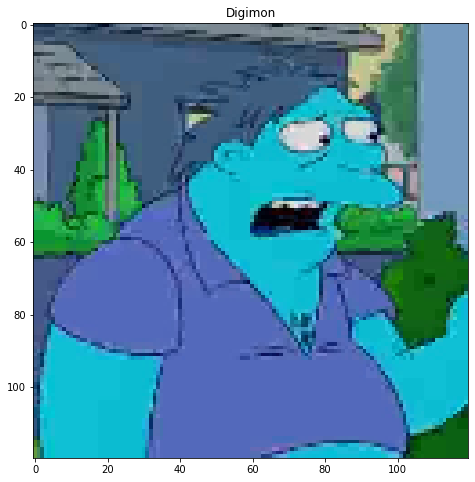

In [10]:
classes = {0:'Digimon', 1:'Pokemon'}
def plot_image(number):
    fig = plt.figure(figsize = (15,8))
    plt.imshow(data[number])
    plt.title(classes[labels[number]])
plot_image(0)
labels[0]

In [11]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_validation, Y_train, Y_validation = train_test_split(data, labels, test_size=0.10, shuffle= True)

## Cifar10 資料讀入及前處理

In [12]:
# Convert class vectors to binary class matrices.
num_classes = 2
img_size = 120

## 模型定義

In [13]:
learning_rate = 0.0001
batch_size = 32 
epochs = 5

optimizer = keras.optimizers.Adam(lr=learning_rate)

In [14]:
inputs = Input(shape=(img_size, img_size, 3))

x = Conv2D(32, (3, 3), padding='same', activation='relu')(inputs)
x = Conv2D(32, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = Conv2D(64, (3, 3), padding='same', activation='relu')(x)
x = MaxPooling2D(pool_size=(2, 2))(x)
x = Dropout(0.25)(x)

x = Flatten()(x)
x = Dense(512, activation='relu')(x)
x = Dropout(0.25)(x)
outputs = Dense(num_classes, activation='softmax')(x)


model = Model(inputs=inputs, outputs=outputs)

In [15]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Input, Dense, Dropout, Activation, Flatten, BatchNormalization, Conv2D, MaxPooling2D

model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same', input_shape=(img_size, img_size, 3)))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(256, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(256, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(1024))
model.add(Activation('relu'))
model.add(Dense(6))
model.add(Activation('softmax'))

In [16]:
model.compile(loss='sparse_categorical_crossentropy',
              optimizer=optimizer,
              metrics=['accuracy'])

In [21]:
train_datagen = ImageDataGenerator( 
                                    rescale=1./255,
                                    rotation_range=10,
                                    width_shift_range=0.05,
                                    height_shift_range=0.05,
                                    horizontal_flip=True,
                                    vertical_flip=False,
                                    fill_mode='wrap'
                                 )
train_generator = train_datagen.flow_from_directory(
                                                    './dataset/train',
                                                    target_size=(img_size, img_size),
                                                    batch_size=1,
                                                    class_mode='categorical')

Found 796 images belonging to 6 classes.


In [22]:
history = model.fit(train_generator, epochs=epochs,validation_data=(testData, test_labels))

Train for 796 steps, validate on 89 samples
Epoch 1/5
  1/796 [..............................] - ETA: 1:18:04

InvalidArgumentError:  Can not squeeze dim[1], expected a dimension of 1, got 6
	 [[node metrics/accuracy/Squeeze (defined at /opt/conda/lib/python3.7/site-packages/tensorflow_core/python/framework/ops.py:1751) ]] [Op:__inference_distributed_function_2917]

Function call stack:
distributed_function


In [18]:
results = model.evaluate(x=testData, y=test_labels, verbose=0)
print("test loss, test acc:", results)

test loss, test acc: [0.7151316163245212, 0.80898875]


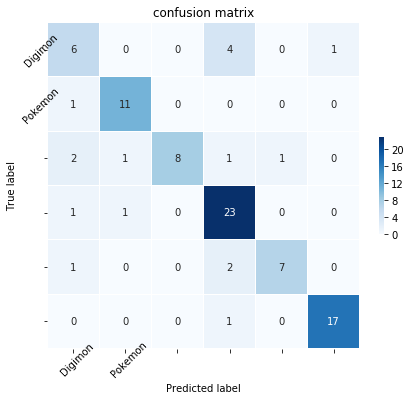

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import seaborn as sns

## plot confusion matrix
y_preds = model.predict(testData)
y_preds = np.argmax(y_preds, axis=1)
y_trues = test_labels
cm = confusion_matrix(y_trues, y_preds)

fig, ax = plt.subplots(figsize=(7, 6))

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar_kws={'shrink': .3}, linewidths=.1, ax=ax)

ax.set(
    xticklabels=list(classes.values()),
    yticklabels=list(classes.values()),
    title='confusion matrix',
    ylabel='True label',
    xlabel='Predicted label'
)
params = dict(rotation=45, ha='center', rotation_mode='anchor')
plt.setp(ax.get_yticklabels(), **params)
plt.setp(ax.get_xticklabels(), **params)
plt.show()

In [20]:
from sklearn.metrics import accuracy_score
y_preds = model.predict(testData)
y_preds = np.argmax(y_preds, axis=1)
y_trues = test_labels

accuracy_score(y_preds, y_trues)

0.8089887640449438